In [23]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\clare\Documents\SHO-simulation\simulation_data.csv", nrows=1000)

data

,TIME,POSITION_X,POSITION_Y,VELOCITY,ACCELERATION
0,0.001,10.000,-0.000,0.010,9.800
1,0.002,10.000,-0.000,0.020,9.800
2,0.003,10.000,-0.000,0.029,9.800
3,0.004,10.000,-0.000,0.039,9.800
4,0.005,10.000,-0.000,0.049,9.800
...,...,...,...,...,...
995,0.996,-56.463,27.488,8841.905,5870487.186
996,0.997,-46.139,22.462,14121.726,5279821.064
997,0.998,-31.585,15.376,18253.365,4131639.528
998,0.999,-14.043,6.837,20766.250,2512884.963


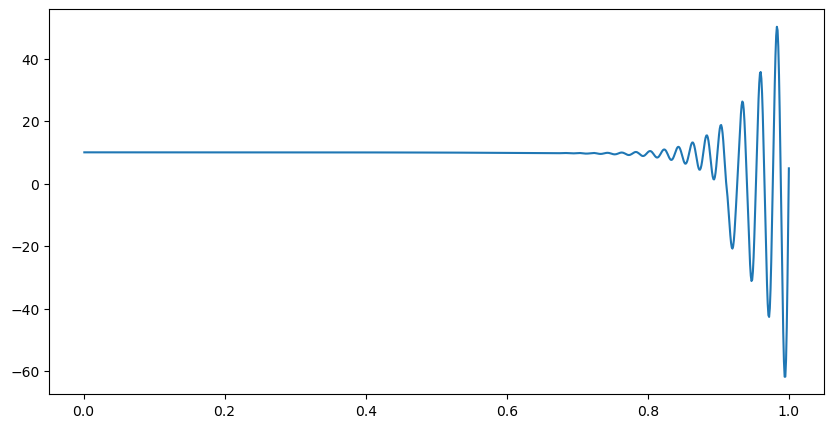

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data["TIME"], data["POSITION_X"])